<center><h1><b>2주차 ✅ 부산광역시 행정동별 대기오염 데이터 가져오기</b></h1></center>

#### ✔️ 사용한 공공데이터 설명

https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15073861

#### ✔️ 서비스 URL

https://apis.data.go.kr/B552584/ArpltnInforInqireSvc/

#### ✔️ Request Prameter

| 항목명         | 설명                                                                                                       |
| -------------- | ---------------------------------------------------------------------------------------------------------- |
| serviceKey     | 공공데이터포털에서 받은 인증키                                                                             |
| returnType     | 응답 데이터 타입 (xml 또는 json)                                                                           |
| numOfRows      | 한 페이지 결과 수                                                                                          |
| pageNo         | 페이지 번호                                                                                                |
| sidoName       | 시도 이름 \*[시도 이름 옵션] 참고                                                                          |
| 시도 이름 옵션 | 전국, 서울, 부산, 대구, 인천, 광주, 대전, 울산, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주, 세종 |
| ver            | 버전                                                                                                       |

<br/>


---

<center><h2><b>데이터 가져오기</b></h2></center>


In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import requests
import time
import json
from bs4 import BeautifulSoup as bs


In [3]:
# config 파일 안에 저장해둔 인증키를 가져온다.
# 인증키 받는 법 -> 공공데이터 이동 API 활용신청
import sys
sys.path.append(
    '/Users/yeomss/Repository/Github/Boot-Project/Like-Lion-AI/Mini-Project/config')

import busan_air


In [18]:
# 쿼리값 세팅
key = busan_air.key['encoding_key']  # 인증키
return_type = 'xml'  # api 반환 타입
num_of_rows = 10  # 한번에 가져오는 아이템의 수
page_no = 1  # 현재 페이지 번호
sido_name = "부산"  # 가져오는 도시 이름
ver = 1.0  # api 버전


In [19]:
# url 세팅
base_url = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"
url = f"{base_url}?serviceKey={key}&returnType={return_type}&numOfRows={num_of_rows}&pageNo={page_no}&sidoName={sido_name}&ver={ver}"


In [ ]:
# url 세팅 권장
# url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMinuDustFrcstDspth'
# params ={'serviceKey' : '서비스키', 'returnType' : 'xml', 'numOfRows' : '100', 'pageNo' : '1', 'searchDate' : '2020-11-14', 'InformCode' : 'PM10' }

# response = requests.get(url, params=params)

In [12]:
# GET 200 OK
res = requests.get(url)
res.status_code


200

In [17]:
# 이렇게 가져와도 됨.
pd.DataFrame(res.json()['response']['body']['items'])

,so2Grade,coFlag,khaiValue,so2Value,coValue,pm25Flag,pm10Flag,o3Grade,pm10Value,khaiGrade,...,no2Grade,o3Flag,pm25Grade,so2Flag,dataTime,coGrade,no2Value,stationName,pm10Grade,o3Value
0,1,None,74,0.007,0.4,None,None,2,40,2,...,2,None,2,None,2022-05-23 11:00,1,0.039,광복동,2,0.038
1,1,None,88,0.006,0.5,None,None,2,44,2,...,2,None,2,None,2022-05-23 11:00,1,0.053,초량동,2,0.045
2,1,None,82,0.004,0.3,None,None,2,29,2,...,1,None,2,None,2022-05-23 11:00,1,0.010,태종대,2,0.068
3,1,None,89,0.005,0.3,None,None,2,26,2,...,1,None,2,None,2022-05-23 11:00,1,0.011,청학동,1,0.077
4,1,None,92,0.005,0.3,None,None,2,39,2,...,1,None,2,None,2022-05-23 11:00,1,0.009,전포동,1,0.080
5,1,None,72,0.004,0.4,None,None,2,38,2,...,2,None,2,None,2022-05-23 11:00,1,0.036,온천동,2,0.056
6,None,통신장애,76,-,-,None,None,2,35,2,...,1,None,2,통신장애,2022-05-23 11:00,None,0.011,명장동,1,0.061
7,1,None,90,0.006,0.5,None,None,2,33,2,...,1,None,2,None,2022-05-23 11:00,1,0.014,대연동,1,0.078
8,1,None,98,0.008,0.5,None,None,2,24,2,...,1,None,1,None,2022-05-23 11:00,1,0.010,용호동,1,0.088
9,1,None,77,0.005,0.4,None,None,2,71,2,...,1,None,2,None,2022-05-23 11:00,1,0.025,학장동,2,0.050


In [233]:
# import re
# re.findall('<[a-zA-Z0-9]+>', str(items[1]))


In [234]:
# 컬럼명 매핑
# 전체 컬럼 매핑
cols_map = {
    'dataTime':	'측정일',
    'mangName':	'측정망정보',
    'so2Value':	'아황산가스농도',
    'coValue'	: '일산화탄소농도',
    'o3Value'	: '오존농도',
    'no2Value':	'이산화질소농도',
    'pm10Value':	'미세먼지(PM10)농도',
    'pm10Value24':	"미세먼지(PM10)24시간예측이동농도",
    'pm25Value'	: '미세먼지(PM2.5)농도',
    'pm25Value24':	"미세먼지(PM2.5)24시간예측이동농도",
    'khaiValue'	: '통합대기환경수치',
    'khaiGrade'	: '통합대기환경지수',
    'so2Grade'	: '아황산가스지수',
    'coGrade':	'일산화탄소지수',
    'o3Grade':	'오존지수',
    'no2Grade':	'이산화질소지수',
    'pm10Grade':	"미세먼지(PM10)24시간등급",
    'pm25Grade'	: "미세먼지(PM2.5)24시간등급",
    'pm10Grade1h':	"미세먼지(PM10)1시간등급",
    'pm25Grade1h':	"미세먼지(PM2.5)1시간등급",
    'so2Flag'	: '아황산가스플래그',
    'coFlag'	: '일산화탄소플래그',
    'o3Flag'	: '오존플래그',
    'no2Flag'	: '이산화질소플래그',
    'pm10Flag'	: '미세먼지(PM10)플래그',
    'pm25Flag'	: '미세먼지(PM2.5)플래그',
    'sidoName': '도시명',
    'stationName': '행정동명'
}

# 컬럼 정렬
cols = [
    "측정일", "도시명", "행정동명", "통합대기환경수치", "통합대기환경지수",
    "아황산가스농도", "아황산가스지수", "아황산가스플래그",
    "일산화탄소농도", "일산화탄소지수", "일산화탄소플래그",
    "이산화질소농도", "이산화질소지수", "이산화질소플래그",
    "오존농도", "오존지수", "오존플래그",
    "미세먼지(PM10)농도", "미세먼지(PM2.5)농도",
    "미세먼지(PM10)24시간등급", "미세먼지(PM2.5)24시간등급",
    "미세먼지(PM10)플래그", "미세먼지(PM2.5)플래그"
]


In [235]:
# 한 페이지 내용을 가져오는 함수
def get_one_data(url):
    # 1) GET 요청
    res = requests.get(url)

    try:
        # 2-1) json 일 경우
        if url.find('json') != -1:
            raw = json.loads(res.text)
            items = raw['response']['body']['items']
            df = pd.json_normalize(items)
            # df = pd.DataFrame(res.json()['response']['body']['items']) # 한 줄로 가능

        # 2-2) xml 일 경우
        elif url.find('xml') != -1:
            raw = bs(res.text, 'xml')
            df = pd.read_xml(str(raw), xpath='.//items/item')

         # 3) 컬럼명 한글로 변경
        df.columns = df.columns.map(cols_map)
        df = df[cols]

    except:
        return pd.DataFrame()

    return df


In [236]:
# get_one_data 테스트
get_one_data(url)


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,아황산가스플래그,일산화탄소농도,일산화탄소지수,일산화탄소플래그,이산화질소농도,이산화질소지수,이산화질소플래그,오존농도,오존지수,오존플래그,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급,미세먼지(PM10)플래그,미세먼지(PM2.5)플래그
0,2022-05-19 23:00,부산,광복동,72,2,0.006,1.0,None,0.4,1.0,None,0.023,1,NaN,0.046,2,NaN,30,23,2,2,NaN,NaN
1,2022-05-19 23:00,부산,초량동,85,2,0.003,1.0,None,0.4,1.0,None,0.051,2,NaN,0.028,1,NaN,29,22,2,2,NaN,NaN
2,2022-05-19 23:00,부산,태종대,78,2,0.003,1.0,None,0.2,1.0,None,0.021,1,NaN,0.063,2,NaN,29,16,1,1,NaN,NaN
3,2022-05-19 23:00,부산,청학동,77,2,0.003,1.0,None,0.2,1.0,None,0.015,1,NaN,0.062,2,NaN,23,12,1,1,NaN,NaN
4,2022-05-19 23:00,부산,전포동,76,2,0.003,1.0,None,0.3,1.0,None,0.015,1,NaN,0.061,2,NaN,27,16,2,2,NaN,NaN
5,2022-05-19 23:00,부산,온천동,73,2,0.003,1.0,None,0.3,1.0,None,0.024,1,NaN,0.057,2,NaN,30,14,2,2,NaN,NaN
6,2022-05-19 23:00,부산,명장동,72,2,-,NaN,통신장애,-,NaN,통신장애,0.011,1,NaN,0.056,2,NaN,29,17,2,2,NaN,NaN
7,2022-05-19 23:00,부산,대연동,66,2,0.003,1.0,None,0.4,1.0,None,0.040,2,NaN,0.034,2,NaN,36,21,2,2,NaN,NaN
8,2022-05-19 23:00,부산,용호동,61,2,0.004,1.0,None,0.4,1.0,None,0.031,2,NaN,0.043,2,NaN,28,19,1,2,NaN,NaN
9,2022-05-19 23:00,부산,학장동,82,2,0.002,1.0,None,0.3,1.0,None,0.011,1,NaN,0.068,2,NaN,39,27,2,2,NaN,NaN


In [237]:
# 모든 데이터 내용을 가져오는 함수

def get_all_data(page_no):
    df_list = []

    while True:
        try:
            # 1) url 세팅
            url = f"{base_url}?serviceKey={key}&returnType={return_type}&numOfRows={num_of_rows}&pageNo={page_no}&sidoName={sido_name}&ver={ver}"

            # 2) 한페이지 데이터 가져오기
            df = get_one_data(url)

            # 3) 만약 가져오는 데이터가 없다면 break
            if df.empty:
                break

            # 4) 리스트에 추가
            df_list.append(df)
        except:
            break

        page_no += 1  # 다음 페이지로
        time.sleep(0.1)

    # 5) 전체 df 합치기
    df = pd.concat(df_list)
    df = df.reset_index(drop=True)
    return df


In [238]:
# get_all_data 테스트

df = get_all_data(page_no)
df.tail()


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,아황산가스플래그,일산화탄소농도,일산화탄소지수,일산화탄소플래그,이산화질소농도,이산화질소지수,이산화질소플래그,오존농도,오존지수,오존플래그,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급,미세먼지(PM10)플래그,미세먼지(PM2.5)플래그
29,2022-05-19 23:00,부산,덕포동,73,2,0.004,1.0,None,0.3,1.0,None,0.018,1,NaN,0.057,2,NaN,29,20,2,2,NaN,NaN
30,2022-05-19 23:00,부산,개금동,79,2,0.003,1.0,NaN,0.4,1.0,NaN,0.023,1,NaN,0.065,2,NaN,39,18,2,2,NaN,NaN
31,2022-05-19 23:00,부산,당리동,69,2,0.002,1.0,NaN,0.4,1.0,NaN,0.025,1,NaN,0.053,2,NaN,32,18,2,2,NaN,NaN
32,2022-05-19 23:00,부산,부산북항,110,3,0.004,1.0,NaN,0.3,1.0,NaN,0.069,3,NaN,0.017,1,NaN,35,18,2,2,NaN,NaN
33,2022-05-19 23:00,부산,부산신항,143,3,0.007,1.0,NaN,0.3,1.0,NaN,0.100,3,NaN,0.025,1,NaN,41,21,2,2,NaN,NaN


---

<center><h2><b>특이값, 결측치</b></h2></center>


In [239]:
# '통신장애' 라는 값이 들어있는 것을 확인
df.describe(include='object')


,측정일,도시명,행정동명,아황산가스농도,아황산가스플래그,일산화탄소농도,일산화탄소플래그
count,34,34,34,34,4,34,4
unique,1,1,34,11,1,6,1
top,2022-05-19 23:00,부산,광복동,0.003,통신장애,0.3,통신장애
freq,34,34,1,13,4,12,4


In [240]:
# 이상치 값 확인해보기
# 아황산가스플래그, 일산화탄소플래그에 각각 4개씩
df[df['아황산가스플래그'] == '통신장애']


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,아황산가스플래그,일산화탄소농도,일산화탄소지수,일산화탄소플래그,이산화질소농도,이산화질소지수,이산화질소플래그,오존농도,오존지수,오존플래그,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급,미세먼지(PM10)플래그,미세먼지(PM2.5)플래그
6,2022-05-19 23:00,부산,명장동,72,2,-,NaN,통신장애,-,NaN,통신장애,0.011,1,NaN,0.056,2,NaN,29,17,2,2,NaN,NaN
11,2022-05-19 23:00,부산,화명동,72,2,-,NaN,통신장애,-,NaN,통신장애,0.016,1,NaN,0.056,2,NaN,37,21,2,2,NaN,NaN
13,2022-05-19 23:00,부산,청룡동,57,2,-,NaN,통신장애,-,NaN,통신장애,0.031,2,NaN,0.038,2,NaN,26,19,1,2,NaN,NaN
27,2022-05-19 23:00,부산,광안동,65,2,-,NaN,통신장애,-,NaN,통신장애,0.029,1,NaN,0.036,2,NaN,38,21,2,2,NaN,NaN


In [241]:
# 이상치 값 모두 변경
df = df.replace('통신장애', np.nan)
len(df[df['아황산가스플래그'] == '통신장애'])


0

In [242]:
# 이상치가 들어있던 값이 변경된 것을 확인 가능
df[df['아황산가스플래그'] == '통신장애']


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,아황산가스플래그,일산화탄소농도,일산화탄소지수,일산화탄소플래그,이산화질소농도,이산화질소지수,이산화질소플래그,오존농도,오존지수,오존플래그,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급,미세먼지(PM10)플래그,미세먼지(PM2.5)플래그


In [243]:
# '-' 라는 str 값이 들어있는 것을 확인
df[df['아황산가스농도'] == '-']


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,아황산가스플래그,일산화탄소농도,일산화탄소지수,일산화탄소플래그,이산화질소농도,이산화질소지수,이산화질소플래그,오존농도,오존지수,오존플래그,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급,미세먼지(PM10)플래그,미세먼지(PM2.5)플래그
6,2022-05-19 23:00,부산,명장동,72,2,-,NaN,NaN,-,NaN,NaN,0.011,1,NaN,0.056,2,NaN,29,17,2,2,NaN,NaN
11,2022-05-19 23:00,부산,화명동,72,2,-,NaN,NaN,-,NaN,NaN,0.016,1,NaN,0.056,2,NaN,37,21,2,2,NaN,NaN
13,2022-05-19 23:00,부산,청룡동,57,2,-,NaN,NaN,-,NaN,NaN,0.031,2,NaN,0.038,2,NaN,26,19,1,2,NaN,NaN
27,2022-05-19 23:00,부산,광안동,65,2,-,NaN,NaN,-,NaN,NaN,0.029,1,NaN,0.036,2,NaN,38,21,2,2,NaN,NaN


In [244]:
# 이상치 결측치로 변경
# df['아황산가스농도'] = df['아황산가스농도'].replace('-', np.nan)
# df['일산화탄소농도'] = df['일산화탄소농도'].replace('-', np.nan)
df = df.replace('-', np.nan)


In [245]:
# 변경 확인
df[df['아황산가스농도'] == '-']


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,아황산가스플래그,일산화탄소농도,일산화탄소지수,일산화탄소플래그,이산화질소농도,이산화질소지수,이산화질소플래그,오존농도,오존지수,오존플래그,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급,미세먼지(PM10)플래그,미세먼지(PM2.5)플래그


In [246]:
# 결측치 보간
# 결측치 보간 이전에 타입 확인
type(df['아황산가스농도'].iloc[0]), type(df['일산화탄소농도'].iloc[0])


(str, str)

In [247]:
# str type 을 float 형식으로 변경
df[['아황산가스농도', '일산화탄소농도']] = df[['아황산가스농도', '일산화탄소농도']].astype(float)
type(df['아황산가스농도'].iloc[0]), type(df['일산화탄소농도'].iloc[0])


(numpy.float64, numpy.float64)

In [248]:
# 다른 방법
# df['아황산가스농도'] = pd.to_numeric(df['아황산가스농도'])
# type(df['아황산가스농도'].iloc[0])


In [249]:
# int type to str 형식으로 변경
# df[['아황산가스농도', '일산화탄소농도']] = df[['아황산가스농도', '일산화탄소농도']].astype(str)
# type(df['아황산가스농도'].iloc[0]), type(df['일산화탄소농도'].iloc[0])


In [250]:
# interpolate() 를 이용하여 값을 기준으로 결측치 보간
# 어떤 식으로 결측치를 보간하는 것이 좋지? 중앙값? 최빈값?
df[['아황산가스농도', '일산화탄소농도']] = df[['아황산가스농도', '일산화탄소농도']].interpolate(method='values')
df[['아황산가스지수', '일산화탄소지수']] = df[['아황산가스지수', '일산화탄소지수']].interpolate(method='values')
# df.loc[:, ['아황산가스농도']] # 결과 확인


In [251]:
# 결측치 값
df.isnull().sum().sum()


204

In [252]:
# 결측값 drop
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)
df.head()


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,일산화탄소농도,일산화탄소지수,이산화질소농도,이산화질소지수,오존농도,오존지수,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급
0,2022-05-19 23:00,부산,광복동,72,2,0.006,1.0,0.4,1.0,0.023,1,0.046,2,30,23,2,2
1,2022-05-19 23:00,부산,초량동,85,2,0.003,1.0,0.4,1.0,0.051,2,0.028,1,29,22,2,2
2,2022-05-19 23:00,부산,태종대,78,2,0.003,1.0,0.2,1.0,0.021,1,0.063,2,29,16,1,1
3,2022-05-19 23:00,부산,청학동,77,2,0.003,1.0,0.2,1.0,0.015,1,0.062,2,23,12,1,1
4,2022-05-19 23:00,부산,전포동,76,2,0.003,1.0,0.3,1.0,0.015,1,0.061,2,27,16,2,2


In [253]:
# 다시 결측값 확인
df.isnull().sum().sum()


0

In [254]:
# 결측값 행: 아황산가스지수, 일산화탄소지수, 일산화탄소농도, 일산화탄소지수
df[df['아황산가스지수'].isnull()]


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,일산화탄소농도,일산화탄소지수,이산화질소농도,이산화질소지수,오존농도,오존지수,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급


---

<center><h2><b>기술 통계</b></h2></center>


In [255]:
# 요약
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   측정일                34 non-null     object 
 1   도시명                34 non-null     object 
 2   행정동명               34 non-null     object 
 3   통합대기환경수치           34 non-null     int64  
 4   통합대기환경지수           34 non-null     int64  
 5   아황산가스농도            34 non-null     float64
 6   아황산가스지수            34 non-null     float64
 7   일산화탄소농도            34 non-null     float64
 8   일산화탄소지수            34 non-null     float64
 9   이산화질소농도            34 non-null     float64
 10  이산화질소지수            34 non-null     int64  
 11  오존농도               34 non-null     float64
 12  오존지수               34 non-null     int64  
 13  미세먼지(PM10)농도       34 non-null     int64  
 14  미세먼지(PM2.5)농도      34 non-null     int64  
 15  미세먼지(PM10)24시간등급   34 non-null     int64  
 16  미세먼지(PM2.5)24시간등급  34 non-nu

In [256]:
# 기술통계
df.describe()


,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,일산화탄소농도,일산화탄소지수,이산화질소농도,이산화질소지수,오존농도,오존지수,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급
count,34.000000,34.000000,34.000000,34.0,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,77.205882,2.058824,0.003368,1.0,0.319118,1.0,0.024176,1.235294,0.054206,1.911765,31.588235,19.617647,1.823529,1.941176
std,15.712916,0.238833,0.001310,0.0,0.070726,0.0,0.018311,0.553711,0.015083,0.287902,4.849977,3.618259,0.386953,0.238833
min,57.000000,2.000000,0.002000,1.0,0.200000,1.0,0.005000,1.000000,0.017000,1.000000,23.000000,12.000000,1.000000,1.000000
25%,69.000000,2.000000,0.003000,1.0,0.300000,1.0,0.014000,1.000000,0.043750,2.000000,28.250000,17.250000,2.000000,2.000000
50%,75.500000,2.000000,0.003000,1.0,0.300000,1.0,0.019500,1.000000,0.057000,2.000000,30.000000,20.000000,2.000000,2.000000
75%,81.750000,2.000000,0.004000,1.0,0.400000,1.0,0.026000,1.000000,0.064500,2.000000,35.750000,21.750000,2.000000,2.000000
max,143.000000,3.000000,0.007000,1.0,0.400000,1.0,0.100000,3.000000,0.079000,2.000000,41.000000,27.000000,2.000000,2.000000


In [257]:
df.describe(include='object')


,측정일,도시명,행정동명
count,34,34,34
unique,1,1,34
top,2022-05-19 23:00,부산,광복동
freq,34,34,1


---

<center><h2><b>데이터 저장</b></h2></center>


In [258]:
# output 폴더에 저장
# file_name = f"../output/0201_{sido_name}_air.csv"

# 현재 폴더에 저장
# file_name = f"./0201_{sido_name}_air.csv"
file_name = f"output/0201_{sido_name}_air.csv"

file_name


'output/0201_부산_air.csv'

In [259]:
# csv 파일로 저장
df.to_csv(file_name, index=False)


In [260]:
# 저장한 파일 읽어보기
# df_ = pd.read_csv(file_name)
df = pd.read_csv(file_name)
df_ = df
df.head()


,측정일,도시명,행정동명,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,일산화탄소농도,일산화탄소지수,이산화질소농도,이산화질소지수,오존농도,오존지수,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급
0,2022-05-19 23:00,부산,광복동,72,2,0.006,1.0,0.4,1.0,0.023,1,0.046,2,30,23,2,2
1,2022-05-19 23:00,부산,초량동,85,2,0.003,1.0,0.4,1.0,0.051,2,0.028,1,29,22,2,2
2,2022-05-19 23:00,부산,태종대,78,2,0.003,1.0,0.2,1.0,0.021,1,0.063,2,29,16,1,1
3,2022-05-19 23:00,부산,청학동,77,2,0.003,1.0,0.2,1.0,0.015,1,0.062,2,23,12,1,1
4,2022-05-19 23:00,부산,전포동,76,2,0.003,1.0,0.3,1.0,0.015,1,0.061,2,27,16,2,2


---

<center><h2><b>데이터 시각화</b></h2></center>


In [261]:
import matplotlib.pyplot as plt
import seaborn as sns


In [262]:
# 한글 꺠짐 폰트 설정
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")


In [263]:
df.describe().style.background_gradient(cmap='coolwarm')


,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,일산화탄소농도,일산화탄소지수,이산화질소농도,이산화질소지수,오존농도,오존지수,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,77.205882,2.058824,0.003368,1.000000,0.319118,1.000000,0.024176,1.235294,0.054206,1.911765,31.588235,19.617647,1.823529,1.941176
std,15.712916,0.238833,0.001310,0.000000,0.070726,0.000000,0.018311,0.553711,0.015083,0.287902,4.849977,3.618259,0.386953,0.238833
min,57.000000,2.000000,0.002000,1.000000,0.200000,1.000000,0.005000,1.000000,0.017000,1.000000,23.000000,12.000000,1.000000,1.000000
25%,69.000000,2.000000,0.003000,1.000000,0.300000,1.000000,0.014000,1.000000,0.043750,2.000000,28.250000,17.250000,2.000000,2.000000
50%,75.500000,2.000000,0.003000,1.000000,0.300000,1.000000,0.019500,1.000000,0.057000,2.000000,30.000000,20.000000,2.000000,2.000000
75%,81.750000,2.000000,0.004000,1.000000,0.400000,1.000000,0.026000,1.000000,0.064500,2.000000,35.750000,21.750000,2.000000,2.000000
max,143.000000,3.000000,0.007000,1.000000,0.400000,1.000000,0.100000,3.000000,0.079000,2.000000,41.000000,27.000000,2.000000,2.000000


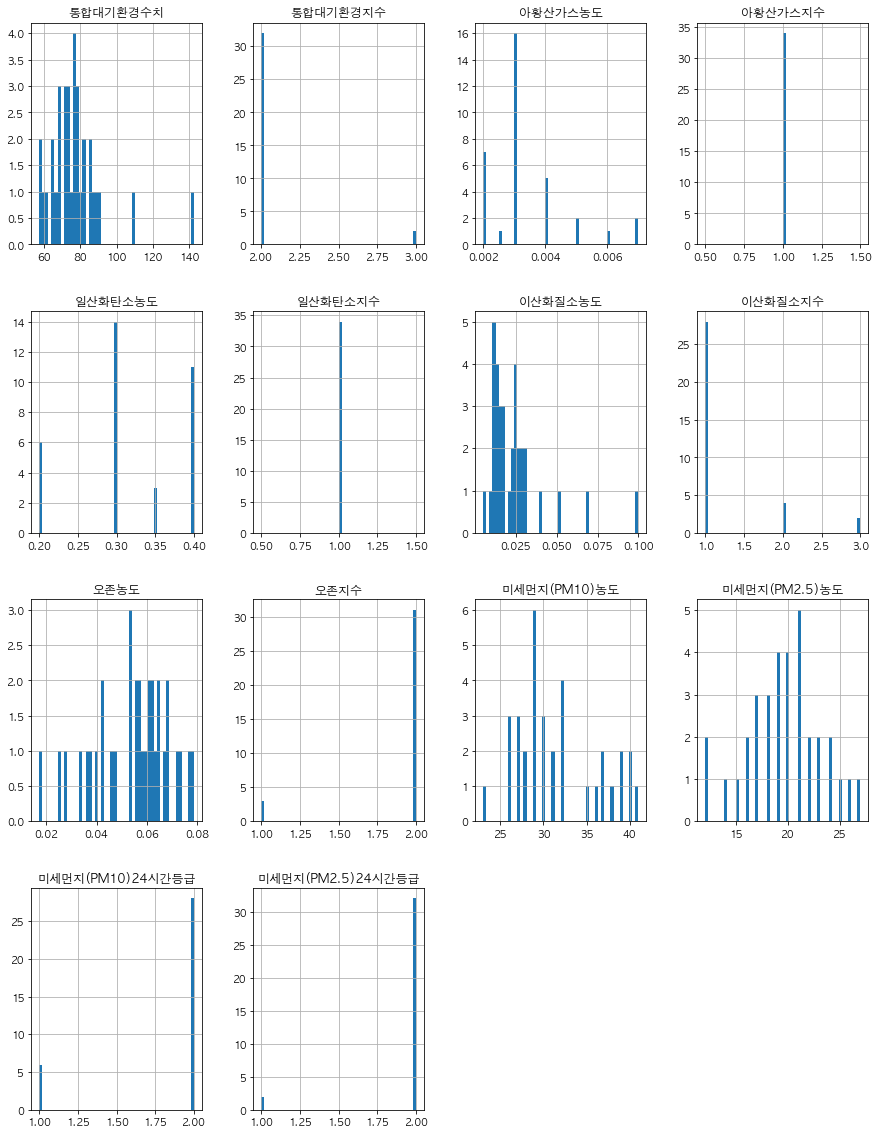

In [264]:
df.hist(figsize=(15, 20), bins=50)
plt.show()


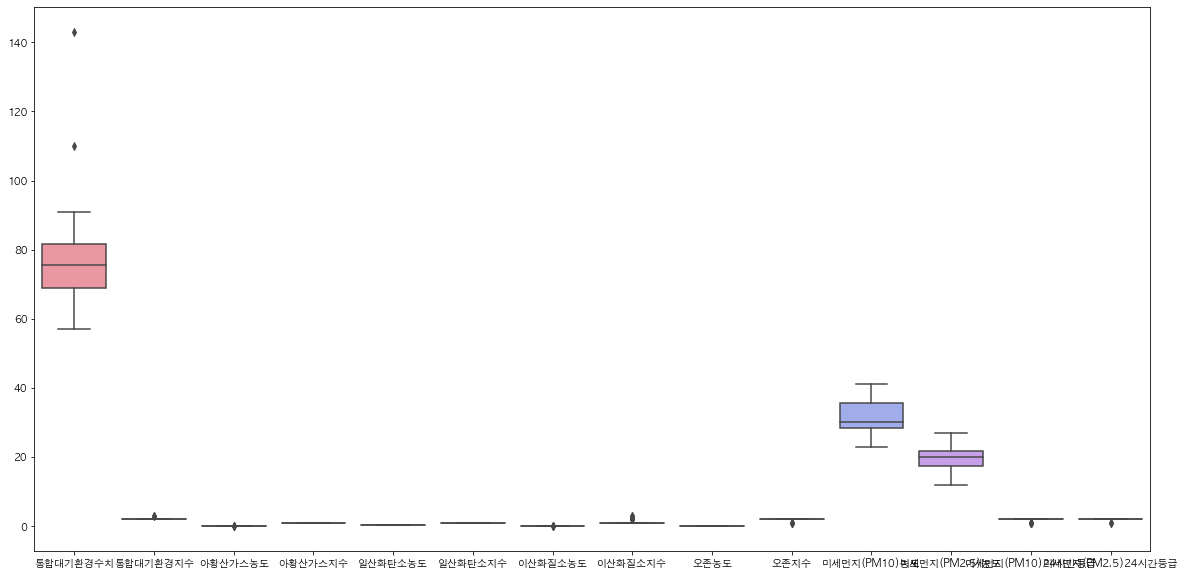

In [265]:
plt.figure(figsize=(20, 10))
_ = sns.boxplot(data=df)


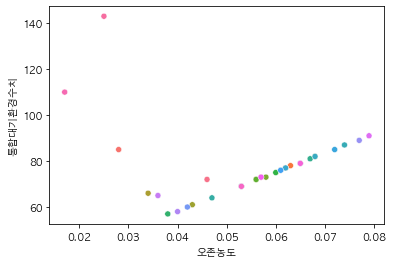

In [266]:
_ = sns.scatterplot(data=df, x='오존농도', y='통합대기환경수치', hue='행정동명', legend=None)


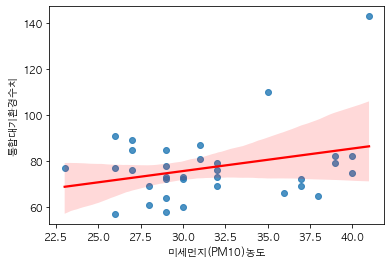

In [267]:
_ = sns.regplot(data=df, x='미세먼지(PM10)농도',
                y='통합대기환경수치', line_kws={'color': 'r'})


In [268]:
df.corr().style.background_gradient(cmap='coolwarm')


/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,통합대기환경수치,통합대기환경지수,아황산가스농도,아황산가스지수,일산화탄소농도,일산화탄소지수,이산화질소농도,이산화질소지수,오존농도,오존지수,미세먼지(PM10)농도,미세먼지(PM2.5)농도,미세먼지(PM10)24시간등급,미세먼지(PM2.5)24시간등급
통합대기환경수치,1.000000,0.796088,0.278075,nan,-0.329497,nan,0.593771,0.548051,-0.084189,-0.712613,0.301762,-0.034285,0.315160,-0.004750
통합대기환경지수,0.796088,1.000000,0.412973,nan,-0.068592,nan,0.835972,0.808746,-0.558657,-0.803638,0.335475,-0.008251,0.115728,0.062500
아황산가스농도,0.278075,0.412973,1.000000,nan,0.167105,nan,0.432954,0.336601,-0.421010,-0.313053,0.065077,0.180758,-0.166999,0.071202
아황산가스지수,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
일산화탄소농도,-0.329497,-0.068592,0.167105,nan,1.000000,nan,0.190353,0.152482,-0.466821,-0.063467,0.257749,0.272179,0.071646,0.427383
일산화탄소지수,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
이산화질소농도,0.593771,0.835972,0.432954,nan,0.190353,nan,1.000000,0.889409,-0.802719,-0.847674,0.327045,0.076516,0.021635,0.085594
이산화질소지수,0.548051,0.808746,0.336601,nan,0.152482,nan,0.889409,1.000000,-0.749791,-0.816267,0.206431,0.031140,-0.083195,0.107833
오존농도,-0.084189,-0.558657,-0.421010,nan,-0.466821,nan,-0.802719,-0.749791,1.000000,0.646312,-0.200128,-0.154541,0.136214,-0.139541
오존지수,-0.712613,-0.803638,-0.313053,nan,-0.063467,nan,-0.847674,-0.816267,0.646312,1.000000,-0.222127,-0.062458,-0.144005,-0.077771
